In [88]:
from os import listdir
from os.path import isfile, join


#apk_path = 'APKs'
apk_path = '6test'
#sesName = apk_path + ".ag"
useSes = True ;

apks = []
for f in listdir(apk_path):
    if isfile(join(apk_path, f)) and f.endswith(".apk"):
        full = './' + apk_path + '/' + f
        apks.append(full)
        print("added: " + full)        

#apks = [f for f in listdir(apk_path) if (isfile(join(apk_path, f)) and f.endswith(".apk"))]

print("number apk's found: ", len(apks))

added: ./6test/neg_a.duMobile.srv.apk
added: ./6test/neg_abhishek.arcdroid.tenth.apk
added: ./6test/neg_air.bg.teracomm.vivablitz.apk
added: ./6test/pos_a.a.hikidashi.apk
added: ./6test/pos_adsindy.com.terla.apk
added: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk
added: ./6test/pos_air.A3bibe.apk
added: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk
number apk's found:  8


In [89]:
from androguard import misc
from androguard import session
from os import listdir
from os.path import isfile, join

if useSes:
    s = misc.get_default_session()
    for apk in apks:    
        digest = s.add(apk)
        print("analysed: " + apk)
else:
    print("not using session analysis cache");


analysed: ./6test/neg_a.duMobile.srv.apk
analysed: ./6test/neg_abhishek.arcdroid.tenth.apk
analysed: ./6test/neg_air.bg.teracomm.vivablitz.apk
analysed: ./6test/pos_a.a.hikidashi.apk
analysed: ./6test/pos_adsindy.com.terla.apk
analysed: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk


Requested API Level could not be found, using 10 instead


analysed: ./6test/pos_air.A3bibe.apk
analysed: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk


In [35]:
from androguard.core.analysis.analysis import ExternalMethod

def analyseMethod(ma, level=0):    
    print(repr(ma))
    for pca, pm, offset in ma.get_xref_from(): #(ClassAnalysis, EncodedMethod or ExternalMethod, int
        #print(repr(ma.get_xref_from()))
        #isExtMethod = isinstance(pm, ExternalMethod)    
        #str = isExtMethod ? "ext-method" : "non-ext-meth"
        print("L{} Call from {} => {}:{}".format(level, pca.name, pm.name, offset))
        print(repr(pm))
        #if(False): #doesnt work
        #    analyseMethod(pm,level+1) 

for apk in apks:
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
        
    for ma in dx.find_methods(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):                
        analyseMethod(ma)
    

    

    

<analysis.MethodClassAnalysis Landroid/webkit/WebSettings;->setUserAgentString(Ljava/lang/String;)V EXTERNAL>
L0 Call from Lorg/apache/cordova/inappbrowser/InAppBrowser$5; => run:2814
L0 Call from Lorg/apache/cordova/engine/SystemWebViewEngine; => initWebViewSettings:690
L0 Call from Lorg/apache/cordova/engine/SystemWebViewEngine; => initWebViewSettings:470
L0 Call from Lorg/apache/cordova/inappbrowser/InAppBrowser$5; => run:2878


In [93]:
from networkx import nx
from networkx import MultiDiGraph
#import networkx as nx
#from networkx import MultiDiGraph
#from networkx import MultiDiGraph
# nx.MultiDiGraph   




for apk in apks:
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
    cg = dx.get_call_graph(classname="Landroid/webkit/WebSettings;",  methodname='setUserAgentString')
    cg.name = apk
    
    print(nx.info(cg) + "\n")
    #print(repr(cg))

    
#    for ma in dx.find_methods(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):                        
#        m = ma.get_method() #  m:ExternalMethod, ma: MethodClassAnalysis,
        #cg = m.get_call_graph()
    
    
    
        
           



Name: ./6test/neg_a.duMobile.srv.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./6test/neg_abhishek.arcdroid.tenth.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./6test/neg_air.bg.teracomm.vivablitz.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./6test/pos_a.a.hikidashi.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./6test/pos_adsindy.com.terla.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./6test/pos_air.A3bibe.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk
Type: DiGraph
Number of nodes: 1
Number of edg

<analysis.ExternalMethod Landroid/webkit/WebSettings;->setUserAgentString(Ljava/lang/String;)V>


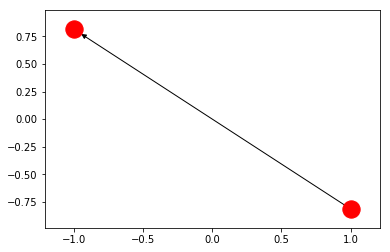

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import MultiDiGraph

for apk in apks:
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
        
    for cg in dx.get_call_graph(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):                
        print( repr(cg))
        pos = nx.spring_layout(G) 
        nx.draw_networkx(G, pos, with_labels=False) # OR: nx.draw(G, pos)
        #nx.draw_networkx(cg)
        #plt.draw()
        #plt.show() 
        

       

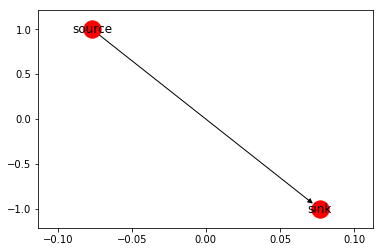

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Step 1: Build up a graph
#G = nx.Graph()
G = nx.MultiDiGraph()
print()
G.add_node('n1', alias='source')
G.add_node('n2', alias='sink')
G.add_edge('n1', 'n2')
 
# Step 2: Draw the graph and suppress node labels (node id)
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels=False) # OR: nx.draw(G, pos)
 
# Step 3: Draw the graph with the specific node labels
node_labels = nx.get_node_attributes(G, 'alias') # a dict of attributes keyed by node
nx.draw_networkx_labels(G, pos, node_labels)
 
#plt.axis('off')
plt.show()
